In [15]:
#     Python code to recognize number in given image, here i have implemented basic algo to extract number from image pixels.

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [16]:
# remove all light color from image, convert it into black-white image based on certain theshold
# image normalization, set dark black-white color pixel if image pixel crosses threshold value

def threshold(imageArray):
    # temprory blank array to hold average of each pixels for each row
    balanceArr = []
    
    # get each row from image array
    for eachRow in imageArray:
        # for each pixels in row
        for eachPix in eachRow:
            # take average of each pixel
            avg = reduce(lambda x,y: x+y, eachPix[:3])/3
            balanceArr.append(avg)
            
    # find average of each pixel in image(row x col)
    balance = reduce(lambda x,y: x+y, balanceArr)/len(balanceArr)
    # temprory image array
    newArray = []
    
    # for each row in image
    for eachRow in imageArray:
        rowArray = [] # row pixels list
        # for each pixels
        for eachPix in eachRow:
            # check if each pixel is grater than threshold value
            if reduce(lambda x,y: x+y, eachPix[:3])/3 > balance:
                # set white color for pixel(which is grater than threshold)
                rowArray.append(np.array([255, 255, 255, 255],dtype='uint8'))
            else:
                # set black color for pixels(which is lesser than threshold)
                rowArray.append(np.array([0, 0, 0, 255],dtype='uint8'))
                
        # append each row in image
        newArray.append(rowArray)
        
    return newArray           


/home/nawaz/Documents/venv/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/home/nawaz/Documents/venv/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in ubyte_scalars


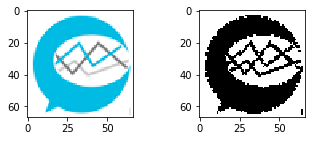

In [17]:
# load images
img = Image.open('images/sentdex.png')
iArr = np.array(img, dtype='uint8')

# set grids
fig = plt.figure()
plot1 = plt.subplot2grid((8,6), (0,0), rowspan=4, colspan=3)
plot2 = plt.subplot2grid((8,6), (0,3), rowspan=4, colspan=3)

# show images
plot1.imshow(iArr)
plot2.imshow(threshold(iArr))


In [18]:
# store image array in txt file
# this method dumps all number images examples to a text file, this text file works as database to compair other images

def makeTxtDatabaseOfImages():
    # create text file
    numberArrayExample = open('storedImagesAsArray.txt', 'w')
    
    # for each image in directory
    for eachNumber in range(0, 10): # each number 
        for eachVersion in range(1, 10): # each number image version
            arr = [] # temporary array contains image as 1D array(after conversion 3 D to 1D)
            imagePath = 'images/numbers/'+str(eachNumber)+'.'+str(eachVersion)+'.png'
            try:
                # open image
                with Image.open(imagePath) as img:
                    # convert image to 3D array
                    imgArray = np.array(img)
                    strRow = str(imgArray.tolist()) 
                    
            except FileNotFoundError:
                print("The file does not exist", imagePath)
            except PermissionError:
                print("You don't have the permission to open the file")
            except Exception:
                print("Unexpected error occured")
            
            # convert image array to string and store it into file
            lineToWrite = str(eachNumber)+'##'+str(strRow)+'\n'               
            numberArrayExample.write(lineToWrite)
makeTxtDatabaseOfImages()

In [19]:
# check for given image number
def whatNumberIsThis(filePath):
    # temporary array to store matched number
    matchedArr = [] 
    # temporary string to store given image array as string
    qImgArrayStr = '' 
    
    # read image file
    img = Image.open(filePath, 'r')
    imgArray = np.array(img)
    qImgArrayStr = str(imgArray.tolist()) 

            
    # get data from image data storage
    with open('storedImagesAsArray.txt', 'r') as db:
        # split data by lines
        lines = db.read().split('\n')
        
        # split each lines
        for eachExample in lines:
            splitExp = eachExample.split('##')
            
            # last line in file contains one element: ['\n']
            if len(splitExp) == 2:
                currentNumber = splitExp[0]
                currentArr  = splitExp[1]
                
                eachPixDB = currentArr.split('],')
                eachPixInExp = qImgArrayStr.split('],')

                # compare given image array with database array
                for index in range(len(eachPixInExp)):
                    if eachPixDB[index] == eachPixInExp[index]:
                        matchedArr.append(int(currentNumber))  
                        
        # return number with higher probability
        return max(set(matchedArr), key=matchedArr.count) 

In [9]:
print(whatNumberIsThis(''))

FileNotFoundError: [Errno 2] No such file or directory: 'images/numbers/1.9.png'